In [58]:
import numpy as np
import cv2
from skimage.transform import resize
import matplotlib.pyplot as plt
import keras.preprocessing.image as image_processor
from keras.applications import VGG16
from keras import backend as K
from keras.models import Model

In [3]:
model = VGG16(weights='imagenet',include_top=False)

In [26]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [163]:
def to_image(image):
    #make the image nice
    img = np.copy(image)
    img -= img.mean()
    img /= (img.std() + 1e-5)
    img *= 0.1
    img += 0.5
    
    img = np.clip(img, 0, 1)
    img *= 255
    return img.astype('uint8')

def generate_pattern_quick(layer_name, filter_index, steps=100):
    size = 150 #hardcoded
    #get the layer
    layer_output = model.get_layer(layer_name).output
    #let's take mean as the loss
    loss = K.mean(layer_output[:, :, :, filter_index])
    #gradient of the image with respect to this loss
    grads = K.gradients(loss, model.input)[0]
    #normalization
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3))*20 + 128.
    
    step = 1.
    total_gradient_steps = steps
    for j in range(total_gradient_steps):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        step = step * 0.99
    return to_image(input_img_data[0])

def generate_pattern(layer_name, filter_index):
    size = 150 #hardcoded
    #get the layer
    layer_output = model.get_layer(layer_name).output
    #let's take mean as the loss
    loss = K.mean(layer_output[:, :, :, filter_index])
    #gradient of the image with respect to this loss
    grads = K.gradients(loss, model.input)[0]
    #normalization
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3))*20 + 128.
    
    total_epochs = 5
    total_gradient_steps = 100
    step = 1.
    for i in range(total_epochs):
        for j in range(total_gradient_steps):
            loss_value, grads_value = iterate([input_img_data])
            input_img_data += grads_value * step
            step = step *0.99
        #zoom a bit into image
        for k in range(3):
            temp = resize(input_img_data[0,:,:,k], (170,170))
            input_img_data[0,:,:,k] = temp[10:160,10:160]
        
    for j in range(total_gradient_steps):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value 
    img = to_image(input_img_data[0])
    return img

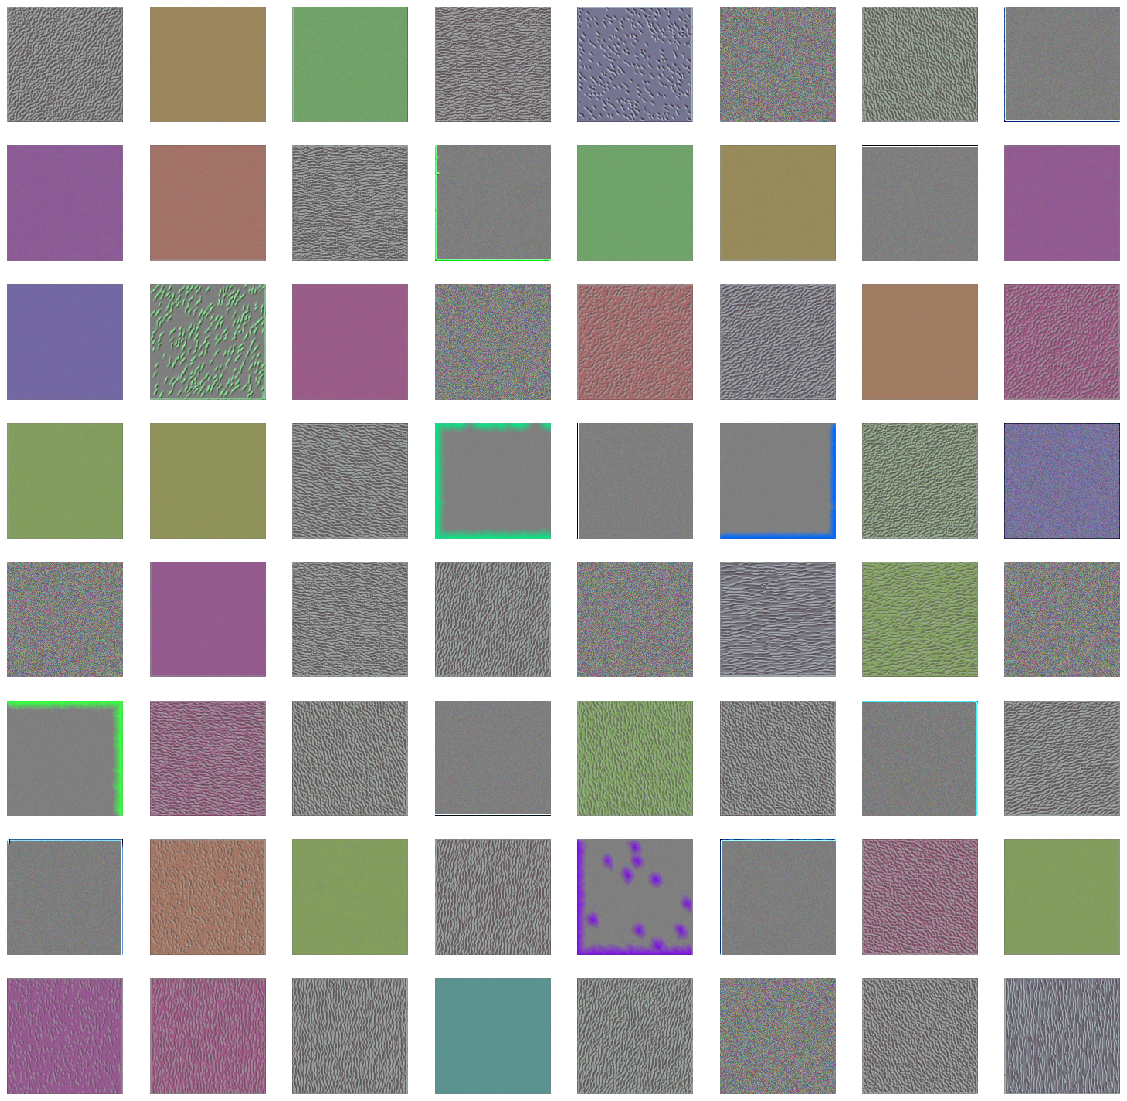

In [145]:
layer_name = 'block1_conv1'
total = 8
fig, axes = plt.subplots(total, total, figsize=(20,20))
for i in range(total):
    for j in range(total):
        ax1= plt.subplot(total, total, i*total + j + 1)
        ax1.axis('off')
        filter_img = generate_pattern_quick(layer_name, i*total + j)
        ax1.imshow(filter_img)
        
plt.show()

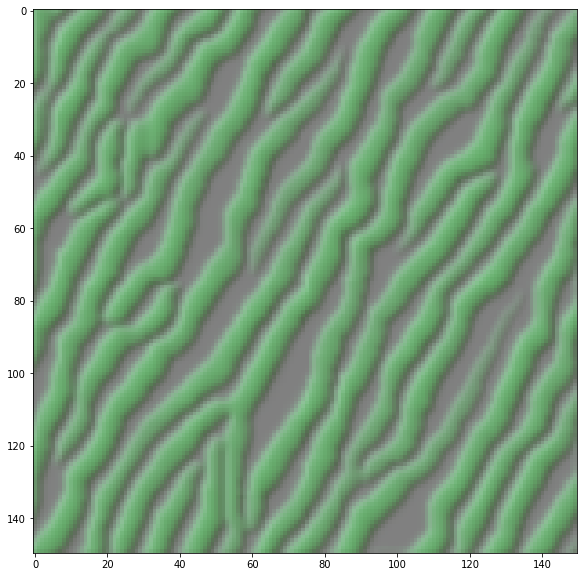

In [147]:
img = generate_pattern('block1_conv1', 17)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

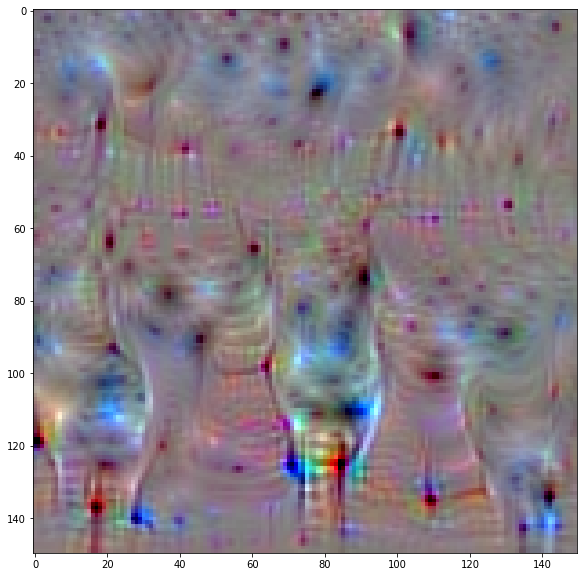

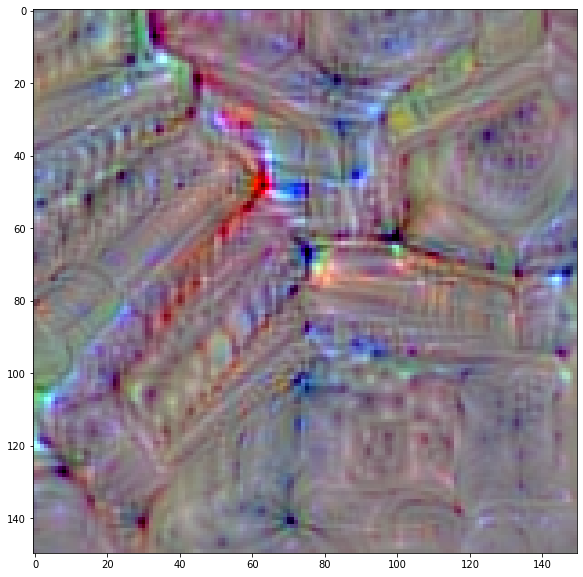

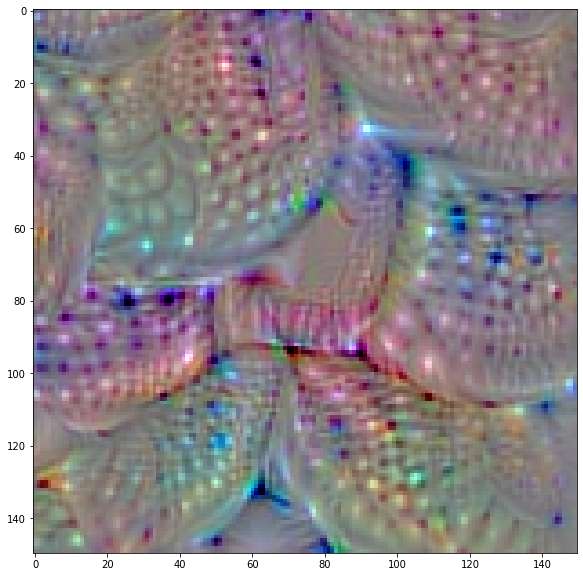

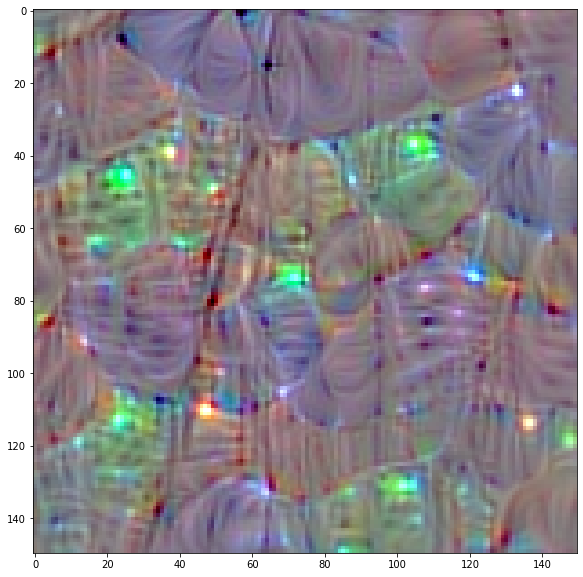

KeyboardInterrupt: 

In [151]:
layer_name = 'block5_conv3'
blocks = [4,12,23,28] #,36, 37, 42,44,45,46, 50, 51,55, 56,73, 103, 113, 118, 119, 143, 149, 172, 179, 180, 185, 187, 199]
for i in blocks:
    filter_img = generate_pattern(layer_name, i)
    plt.figure(figsize=(10,10))
    plt.imshow(filter_img)
    plt.show()

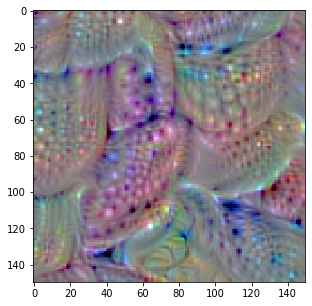

In [155]:
img = generate_pattern('block5_conv3', 23)
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()

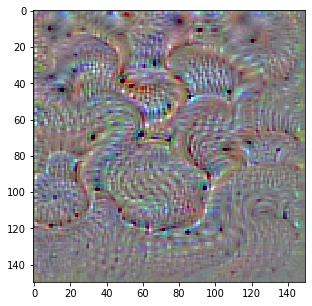

In [162]:
img = generate_pattern_quick('block5_conv3', 179)
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()

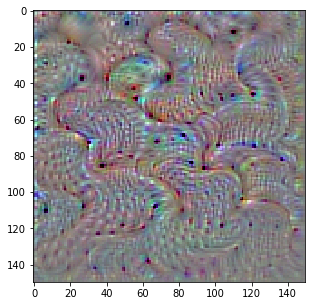

In [164]:
img = generate_pattern_quick('block5_conv3', 179, steps=1000)
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()

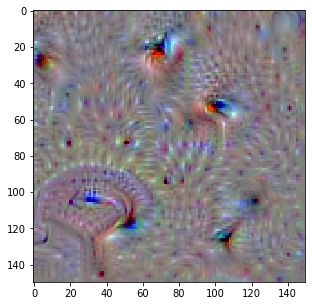

In [165]:
img = generate_pattern('block5_conv3', 179)
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()

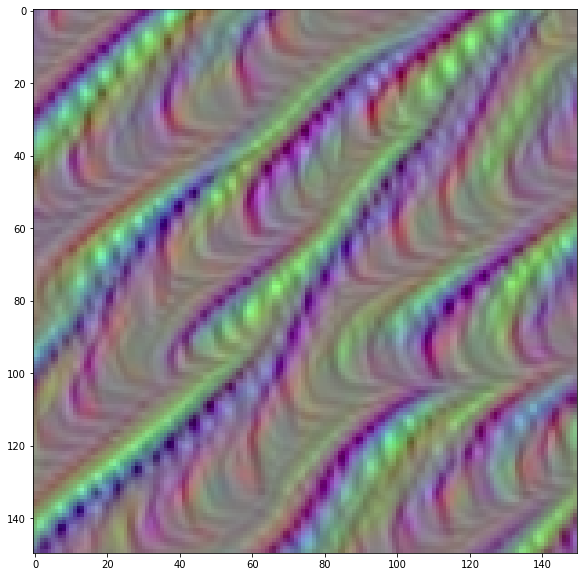

In [108]:
img = generate_pattern('block3_conv2', 10)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

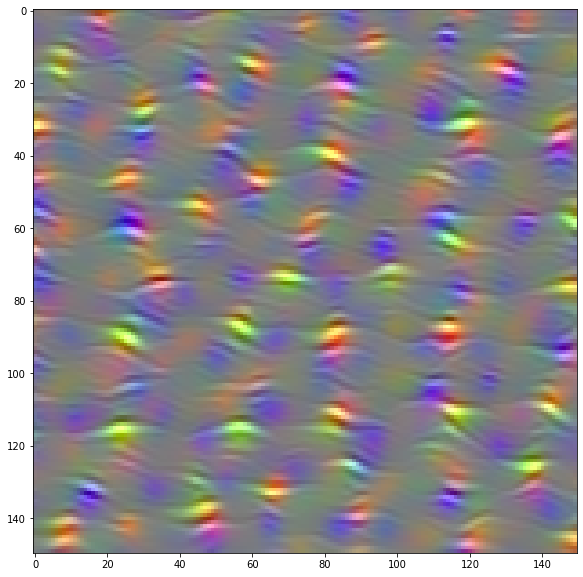

In [109]:
img = generate_pattern('block3_conv2', 20)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

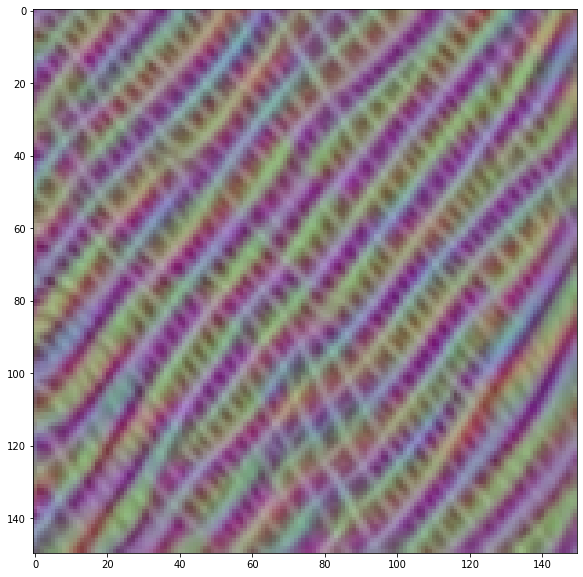

In [110]:
img = generate_pattern('block3_conv2', 200)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

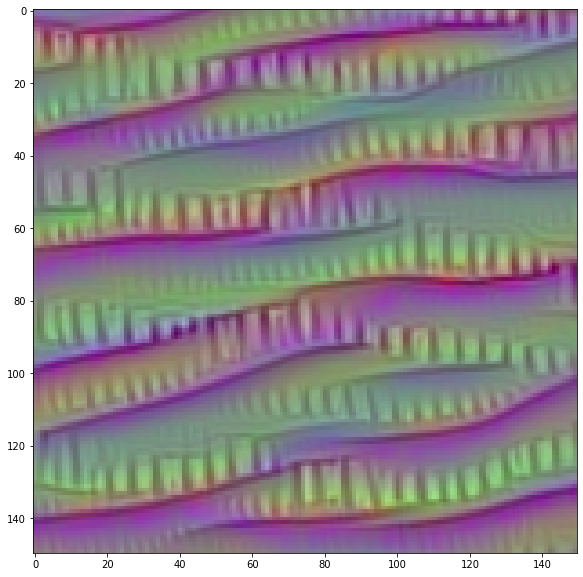

In [111]:
img = generate_pattern('block3_conv2', 235)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

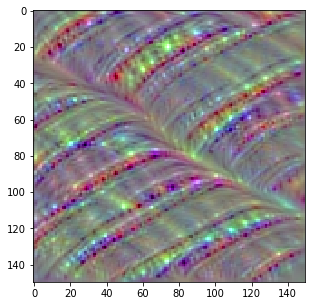

In [159]:
img = generate_pattern('block4_conv1', 7)
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()

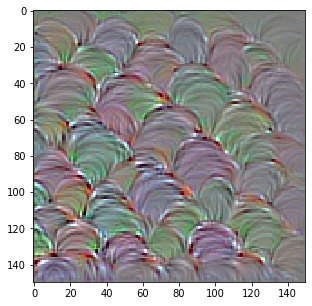

In [160]:
img = generate_pattern_quick('block4_conv1', 6)
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()

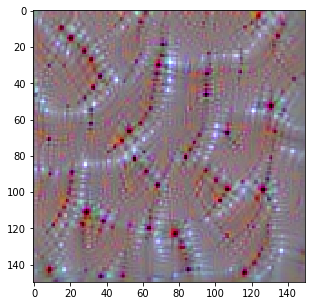

In [161]:
img = generate_pattern('block4_conv1', 5)
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()